In [1]:
# XGBoost

# Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Importing the dataset

dataset = pd.read_csv('all13.csv')
X = dataset.iloc[:,15:-1]
Y = dataset.iloc[:,25]

In [3]:
X.describe()

,MILLING_CODE,IRI PREVIOUS,TIME PASSED SINCE LAST REHABILITATION,TOTAL_THICKNESS,OVERLAY_THICKNESS,TEMP_AVG,FREEZE_INDEX,PRECIPITATION,NUMBER OF PRESERVATION ACTIVITIES,EXTREME DECREASE
count,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000
mean,0.560662,1.141838,7.247614,670.389632,61.142279,13.583088,308.409191,907.692647,1.047794,0.127574
std,0.496398,0.493858,5.192386,265.134566,31.935831,6.452794,455.999664,475.735804,1.051066,0.333676
min,0.000000,0.410000,0.000000,203.200000,2.500000,2.000000,0.000000,12.000000,0.000000,0.000000
25%,0.000000,0.820000,2.890000,505.400000,40.600000,8.000000,0.000000,581.500000,0.000000,0.000000
50%,1.000000,1.030000,6.760000,631.100000,50.800000,13.000000,65.000000,912.000000,1.000000,0.000000
75%,1.000000,1.320000,10.792500,820.400000,71.100000,19.000000,442.000000,1287.250000,1.000000,0.000000
max,1.000000,5.670000,27.330000,2578.100000,177.800000,25.000000,2018.000000,2386.000000,8.000000,1.000000


In [4]:
Y.describe()

count    2720.000000
mean        1.093908
std         0.427568
min         0.410000
25%         0.810000
50%         1.010000
75%         1.280000
max         4.070000
Name: IRI, dtype: float64

In [7]:
# split data into train and test sets

seed = 18
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

x2 = X_train.copy()
ds1 = pd.DataFrame(data=x2)
ds1['IRIF'] = list(y_train)

In [8]:
# fit model

reg =XGBRegressor(n_estimators=500, reg_lambda=1, gamma=0, max_depth=5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [10]:
# R2 & RMSE

MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
R2=r2_score(y_test, y_pred)
print("R2:\n", round(R2,3))
print("\n")
print("Root Mean Square Error:\n", round(RMSE,3))
print("\n")
print("Mean Square Error:\n", round(MSE,3))

R2:
 0.893


Root Mean Square Error:
 0.131


Mean Square Error:
 0.017


In [11]:
#Correlaton Matrix

matrix = ds1.corr()
matrix

,MILLING_CODE,IRI PREVIOUS,TIME PASSED SINCE LAST REHABILITATION,TOTAL_THICKNESS,OVERLAY_THICKNESS,TEMP_AVG,FREEZE_INDEX,PRECIPITATION,NUMBER OF PRESERVATION ACTIVITIES,EXTREME DECREASE,IRIF
MILLING_CODE,1.000000,-0.117407,0.046941,0.098735,0.197805,0.291331,-0.197989,-0.124990,0.078151,-0.009542,-0.146382
IRI PREVIOUS,-0.117407,1.000000,-0.056107,-0.074112,-0.036018,-0.166532,0.153855,-0.091790,0.073408,0.424457,0.653071
TIME PASSED SINCE LAST REHABILITATION,0.046941,-0.056107,1.000000,0.096940,0.029484,0.166876,-0.102387,0.028709,0.285744,-0.471385,0.290448
TOTAL_THICKNESS,0.098735,-0.074112,0.096940,1.000000,-0.051953,0.018142,-0.018896,0.226778,-0.122636,-0.046198,-0.088755
OVERLAY_THICKNESS,0.197805,-0.036018,0.029484,-0.051953,1.000000,-0.056578,0.057056,-0.388963,0.187084,-0.034384,-0.058003
TEMP_AVG,0.291331,-0.166532,0.166876,0.018142,-0.056578,1.000000,-0.826501,-0.063471,-0.033219,0.000472,-0.163673
FREEZE_INDEX,-0.197989,0.153855,-0.102387,-0.018896,0.057056,-0.826501,1.000000,-0.059094,0.037622,-0.023660,0.158755
PRECIPITATION,-0.124990,-0.091790,0.028709,0.226778,-0.388963,-0.063471,-0.059094,1.000000,-0.127134,0.067575,-0.143736
NUMBER OF PRESERVATION ACTIVITIES,0.078151,0.073408,0.285744,-0.122636,0.187084,-0.033219,0.037622,-0.127134,1.000000,-0.138575,0.193021
EXTREME DECREASE,-0.009542,0.424457,-0.471385,-0.046198,-0.034384,0.000472,-0.023660,0.067575,-0.138575,1.000000,-0.180488


In [12]:
# output-prediction results

x1 = X_test.copy()
ds2 = pd.DataFrame(data=x1)
ds2['IRIF'] = list(y_pred)
ds2.to_csv('IRI_Predicted.csv')

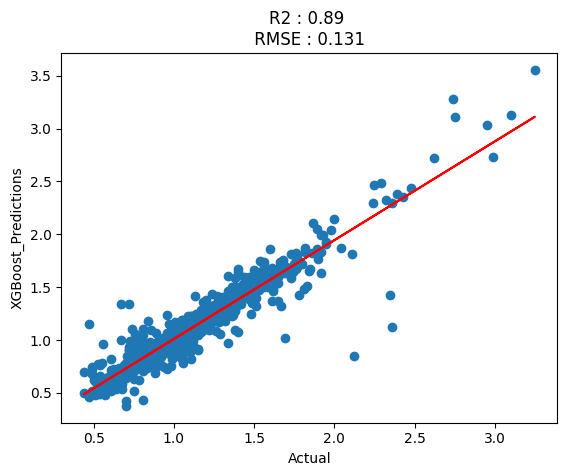

In [13]:
# Plot

slope, intercept, r, p, std_err = stats.linregress(y_test, y_pred)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, y_test))

plt.scatter(y_test, y_pred)
plt.plot(y_test, mymodel, color = "r")
plt.title(f"R2 : {round(R2,2)} \n RMSE : {round(RMSE,3)} ")
plt.xlabel("Actual")
plt.ylabel("XGBoost_Predictions")
plt.show()